In [1]:
import pandas as pd
from tensorflow import keras
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
dataset = pd.read_csv("weatherHistory.csv")
dataset.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [3]:
dataset = dataset.drop(columns=["Formatted Date", "Summary", "Precip Type", "Loud Cover", "Daily Summary"])
dataset.head()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
0,9.472222,7.388889,0.89,14.1197,251.0,15.8263,1015.13
1,9.355556,7.227778,0.86,14.2646,259.0,15.8263,1015.63
2,9.377778,9.377778,0.89,3.9284,204.0,14.9569,1015.94
3,8.288889,5.944444,0.83,14.1036,269.0,15.8263,1016.41
4,8.755556,6.977778,0.83,11.0446,259.0,15.8263,1016.51


In [4]:
features = dataset.drop(columns=["Humidity"])
target = dataset["Humidity"]

x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)
x_test, x_val, y_test, y_val = train_test_split(x_test, y_test, test_size=0.5, random_state=42)

In [5]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
x_val = scaler.transform(x_val)

In [6]:
model = keras.Sequential([
    keras.layers.Dense(32, activation="relu", input_shape=(x_train.shape[1],)),
    keras.layers.Dense(16, activation="relu"),
    keras.layers.Dense(8, activation="relu"),
    keras.layers.Dense(1)
])

print(model.summary())

c:\Github\deep-learning\venv\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 32)             │           224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 897 (3.50 KB)

 Trainable params: 897 (3.50 KB)

 Non-trainable params: 0 (0.00 B)

None


In [7]:
model.compile(optimizer="adam", loss="mse", metrics=["mae"])

In [8]:
early_stopping = keras.callbacks.EarlyStopping(monitor="val_loss", patience=5, restore_best_weights=True)
history = model.fit(x_train, y_train, epochs=50, validation_data=(x_val, y_val), callbacks=[early_stopping])

Epoch 1/50
2412/2412 ━━━━━━━━━━━━━━━━━━━━ 3s 887us/step - loss: 0.0421 - mae: 0.1294 - val_loss: 0.0146 - val_mae: 0.0911
Epoch 2/50
2412/2412 ━━━━━━━━━━━━━━━━━━━━ 2s 837us/step - loss: 0.0140 - mae: 0.0895 - val_loss: 0.0137 - val_mae: 0.0875
Epoch 3/50
2412/2412 ━━━━━━━━━━━━━━━━━━━━ 2s 840us/step - loss: 0.0132 - mae: 0.0866 - val_loss: 0.0133 - val_mae: 0.0878
Epoch 4/50
2412/2412 ━━━━━━━━━━━━━━━━━━━━ 2s 826us/step - loss: 0.0129 - mae: 0.0853 - val_loss: 0.0128 - val_mae: 0.0849
Epoch 5/50
2412/2412 ━━━━━━━━━━━━━━━━━━━━ 2s 834us/step - loss: 0.0127 - mae: 0.0845 - val_loss: 0.0129 - val_mae: 0.0875
Epoch 6/50
2412/2412 ━━━━━━━━━━━━━━━━━━━━ 2s 847us/step - loss: 0.0125 - mae: 0.0838 - val_loss: 0.0124 - val_mae: 0.0834
Epoch 7/50
2412/2412 ━━━━━━━━━━━━━━━━━━━━ 2s 835us/step - loss: 0.0124 - mae: 0.0834 - val_loss: 0.0124 - val_mae: 0.0838
Epoch 8/50
2412/2412 ━━━━━━━━━━━━━━━━━━━━ 2s 839us/step - loss: 0.0123 - mae: 0.0829 - val_loss: 0.0123 - val_mae: 0.0829
Epoch 9/50
2412/2412 ━━━

In [9]:
loss, mae = model.evaluate(x_test, y_test)
print("Loss:", loss)
print("MAE:", mae)

302/302 ━━━━━━━━━━━━━━━━━━━━ 0s 639us/step - loss: 0.0120 - mae: 0.0801
Loss: 0.012045207433402538
MAE: 0.08009865880012512


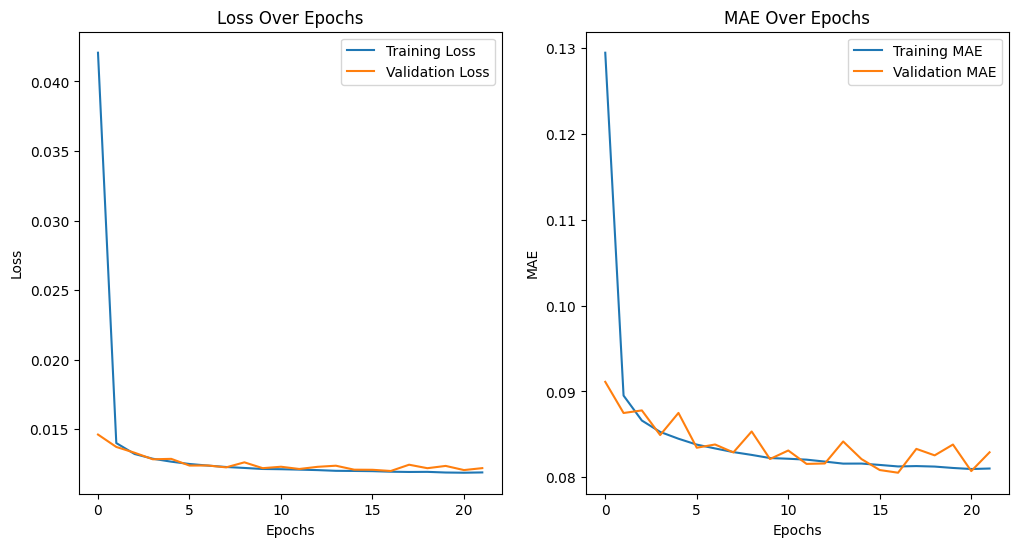

In [10]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.title("Loss Over Epochs")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history["mae"], label="Training MAE")
plt.plot(history.history["val_mae"], label="Validation MAE")
plt.title("MAE Over Epochs")
plt.xlabel("Epochs")
plt.ylabel("MAE")
plt.legend()
plt.show()

In [11]:
predictions = model.predict(x_test[20:40])
for (x, y) in zip(predictions, y_test[20:40]):
    print(f"Predicted: {x[0]:.2f}, Actual: {y}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Predicted: 0.82, Actual: 0.83
Predicted: 0.80, Actual: 0.81
Predicted: 0.54, Actual: 0.58
Predicted: 0.50, Actual: 0.49
Predicted: 0.72, Actual: 0.76
Predicted: 0.81, Actual: 0.57
Predicted: 0.67, Actual: 0.61
Predicted: 0.91, Actual: 0.87
Predicted: 0.94, Actual: 0.93
Predicted: 0.58, Actual: 0.61
Predicted: 0.70, Actual: 0.49
Predicted: 0.59, Actual: 0.57
Predicted: 0.82, Actual: 1.0
Predicted: 0.28, Actual: 0.28
Predicted: 0.54, Actual: 0.49
Predicted: 0.77, Actual: 0.87
Predicted: 0.83, Actual: 0.83
Predicted: 0.97, Actual: 0.94
Predicted: 0.90, Actual: 0.89
Predicted: 0.75, Actual: 0.82
